In [618]:
import numpy as np
from numpy.linalg import inv
from ott.geometry.costs import SqEuclidean

import matplotlib.pyplot as plt

In [619]:
np.random.seed(5)

num_a = 10
num_b = 20

num_iters = 10
num_blocked_pairs = num_b

In [620]:
# a = np.arange(num_a)
# b = (np.arange(num_b)*0.5 - 5)
a = np.arange(num_a)
b = (np.arange(num_b)*0.5 - 2)

# u = np.ones_like(a) / a.shape[0]
# v = np.ones_like(b) / b.shape[0]
u = np.random.random(a.shape[0])
u /= np.sum(u)
v = np.random.random(b.shape[0])
v /= np.sum(v)

C = SqEuclidean().all_pairs(a.reshape(-1,1), b.reshape(-1,1))

# plt.imshow(C)

In [621]:
gamma_0 = 1.99 # closeness to reference plan / regularisation
gamma = 1.005 # enforcement of column constraints

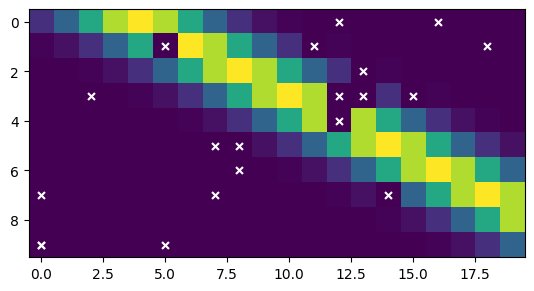

In [622]:
K = np.pow(np.e, -C / gamma_0)

l_idxs_x = np.random.choice(np.arange(a.shape[0]), num_blocked_pairs)
l_idxs_y = np.random.choice(np.arange(b.shape[0]), num_blocked_pairs)

K[l_idxs_x, l_idxs_y] = 0

plt.imshow(K)
plt.scatter(l_idxs_y, l_idxs_x, marker='x', s=25, c='white')

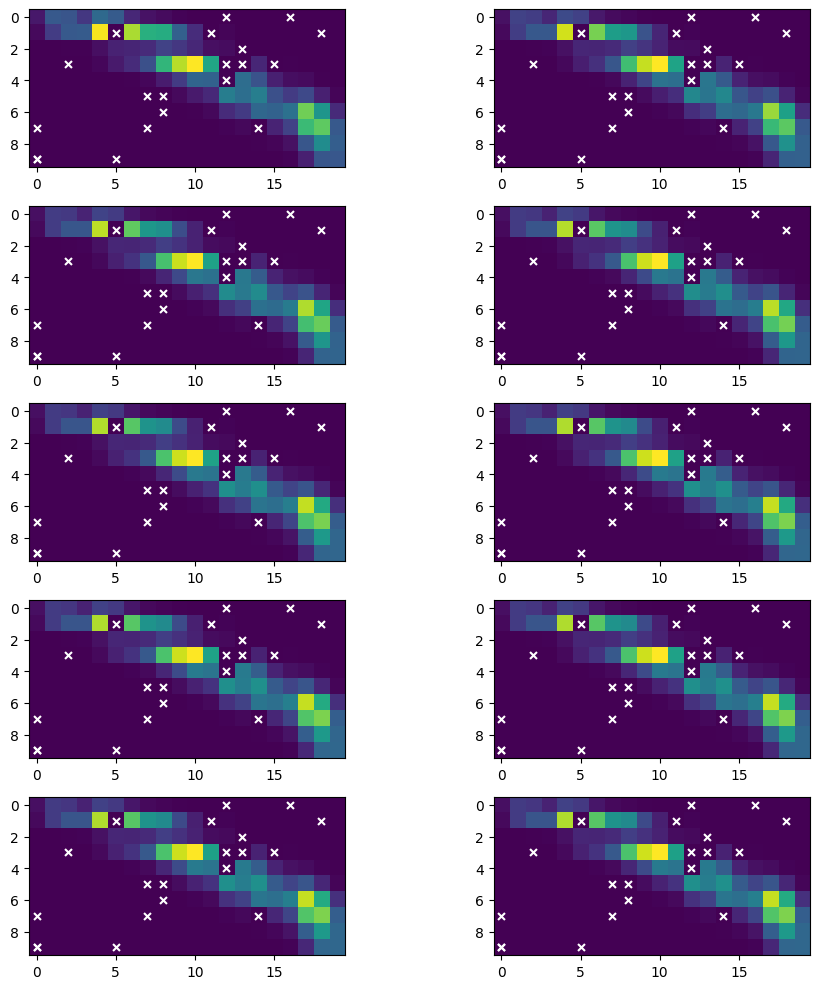

In [623]:
T = K
T_old = T
differ = np.zeros((num_iters,))

fig, axs = plt.subplots(np.ceil(num_iters/2).astype(int), 2, figsize=(10,10))
axs = axs.ravel()

for i in range(num_iters):
    D1 = inv(np.diag(np.sum(T, axis=1))) * u
    T = D1.dot(T)

    D2 = inv(np.diag(np.sum(T, axis=0))) * v
    D2 = np.pow(D2, gamma/(1+gamma))
    T = T.dot(D2)

    v = np.diag(np.pow(np.diag(D2), -1/gamma)).dot(v)

    differ[i] = np.linalg.norm((T - T_old).ravel(), ord=1)
    T_old = T

    axs[i].imshow(T)
    axs[i].scatter(l_idxs_y, l_idxs_x, marker='x', s=25, c='white')
fig.tight_layout()

Text(0, 0.5, 'Change in T')

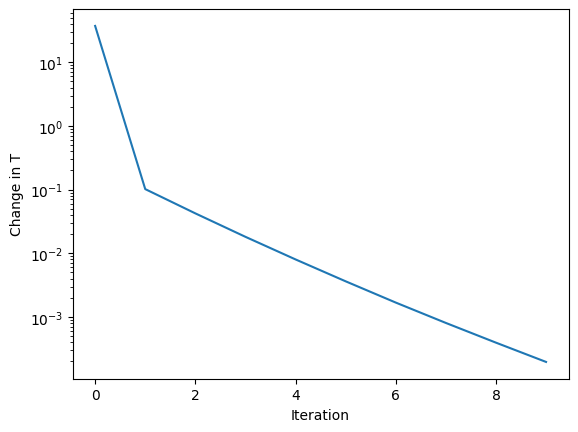

In [624]:
fig, ax = plt.subplots()

ax.plot(differ)
ax.set_yscale('log')
ax.set_xlabel('Iteration')
ax.set_ylabel('Change in T')

Text(0.5, 1.0, 'Column Violations (v)')

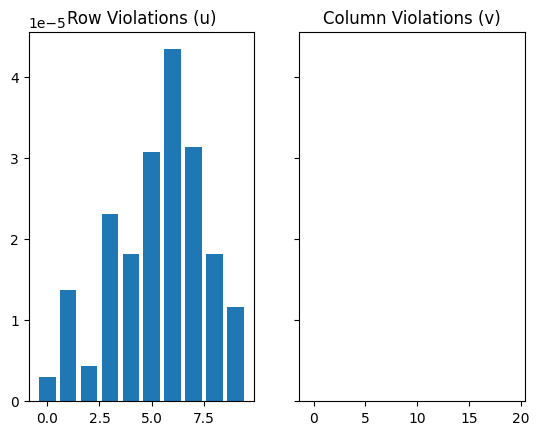

In [625]:
fig, (ax_r, ax_c) = plt.subplots(1,2, sharey='row')
ax_r.bar(x=np.arange(num_a), height=np.abs(u - np.sum(T, axis=1)))
ax_r.set_title('Row Violations (u)')

ax_c.bar(x=np.arange(num_b), height=np.abs(v - np.sum(T, axis=0)))
ax_c.set_title('Column Violations (v)')